# REQUIREMENTS

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data

In [216]:
#LOCAL
df = pd.read_csv('garments_worker_productivity.csv') # data with added weather info from APIs

df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# EDA

In [217]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

found null value at "wip" column

In [219]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [220]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## Univariate Analysis:
- Analyzing each feature individually

### Simple boxplot

In [221]:
df1 = df.iloc[:, 4:]
df1

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


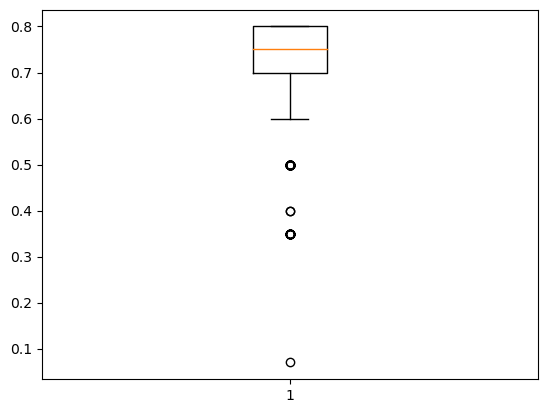

In [222]:
plt.boxplot(df1['targeted_productivity']);

In [223]:
h =(12,30)
h[0]

12

In [224]:
df1.shape[1]

11

In [225]:
df1.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [226]:
for i ,j in enumerate(df1.columns):
    print(i,j)

0 team
1 targeted_productivity
2 smv
3 wip
4 over_time
5 incentive
6 idle_time
7 idle_men
8 no_of_style_change
9 no_of_workers
10 actual_productivity


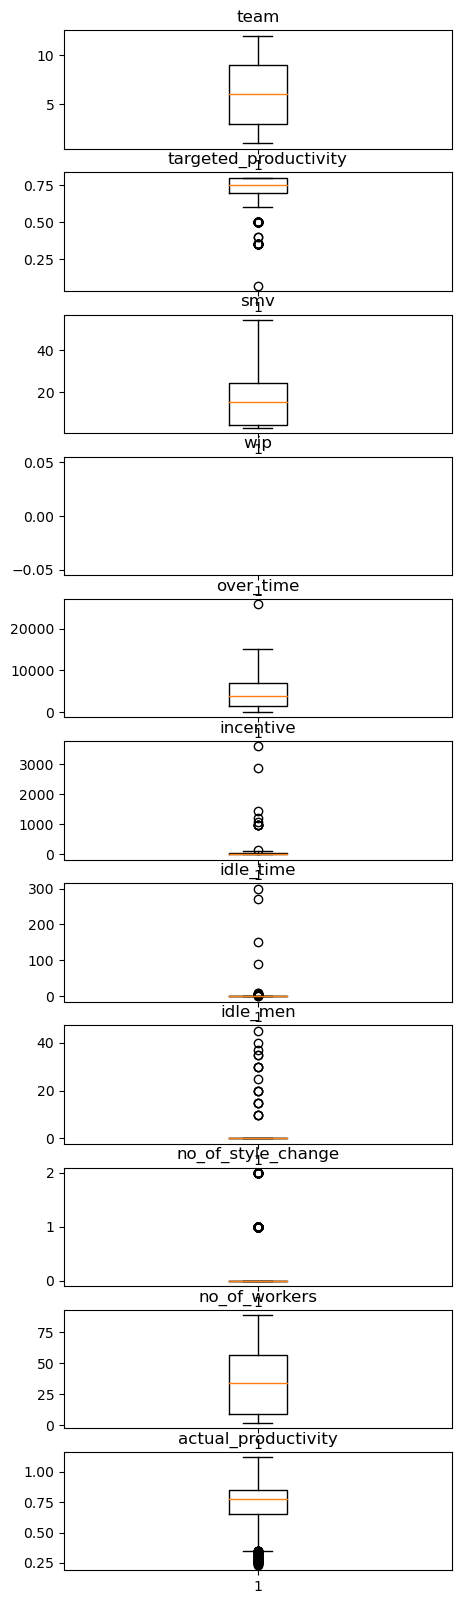

In [227]:
# numerical 
df1.shape[1]
fig, ax = plt.subplots(nrows=df1.shape[1], figsize=(5,20))
for i, col in enumerate(df1.columns):
    ax[i].boxplot(df1[col])
    ax[i].set_title(col)

# datetime

In [228]:
df.date.unique()

array(['1/1/2015', '1/3/2015', '1/4/2015', '1/5/2015', '1/6/2015',
       '1/7/2015', '1/8/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/7/2015', '2/8/2015', '2/9/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/1/2015',
       '3/2/2015', '3/3/2015', '3/4/2015', '3/5/2015', '3/7/2015',
       '3/8/2015', '3/9/2015', '3/10/2015', '3/11/2015'], dtype=object)

# month, day

In [229]:
df['date'].apply(lambda x: x.split('/'))
# df['date'].apply(lambda x: x.split('/')[1])

0        [1, 1, 2015]
1        [1, 1, 2015]
2        [1, 1, 2015]
3        [1, 1, 2015]
4        [1, 1, 2015]
            ...      
1192    [3, 11, 2015]
1193    [3, 11, 2015]
1194    [3, 11, 2015]
1195    [3, 11, 2015]
1196    [3, 11, 2015]
Name: date, Length: 1197, dtype: object

In [157]:
# int((int(15)-1) / 7)

In [230]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [232]:
# df['day_of_month'] = df['date'].apply(lambda x: x.split('/')[1])
# df['month'] = df['date'].apply(lambda x: x.split('/')[0])
# # df['week'] = df['day_of_month'].apply(lambda x: int((int(x)-1) / 7) + 1)

# df = df.drop(['date'], axis=1)
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,11,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,11,3


In [160]:
# df

### quarter 
- The description for ```quarter``` reads: *A portion of the month. A month was divided into four quarters*  
This seems redundant, as we already have separate datetime features, so we will drop this

In [233]:
# df = df.drop(['quarter'], axis=1)
df.tail(5)

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month
1192,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333,11,3
1193,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625,11,3
1194,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625,11,3
1195,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889,11,3
1196,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722,11,3


### ```department```

In [234]:
df.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

sewing mispelled into sweing

finishing  with a space makes a new category in department column.

In [235]:
df.loc[df.department=='sweing', 'department'] = 'sewing'
df.loc[df.department=='finishing ', 'department'] = 'finishing'

df.department.unique()

array(['sewing', 'finishing'], dtype=object)

In [236]:
df.department.value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

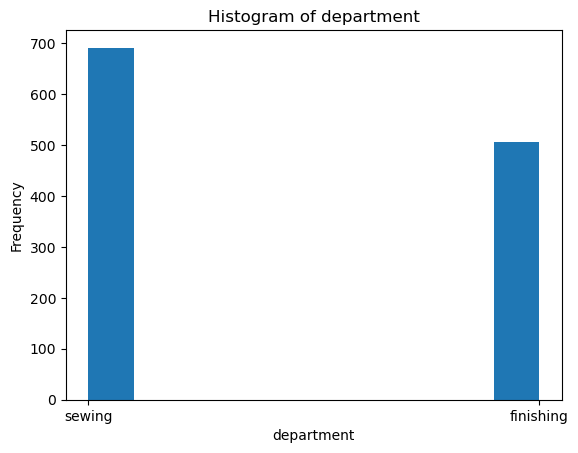

In [237]:
#Plot department feature
plt.hist(df['department'])

# Add labels and title
plt.xlabel('department')
plt.ylabel('Frequency')
plt.title('Histogram of department');

### smv std. minute value

In [238]:
df.smv.describe()

count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64

In [239]:
# box plot on a feature using plotly
fig = px.box(df, y='smv')

# Add labels and title
fig.update_layout(
    xaxis_title='Standard Minute Value',
    yaxis_title='Feature Value',
    title='Box Plot of SMV'
)

fig.show()

# over_time

In [240]:
df.over_time.describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

In [241]:
# box plot on Overtime using plotly
fig = px.box(df, y='over_time')

# Add labels and title
fig.update_layout(
    xaxis_title='over_time (minutes)',
    yaxis_title='over_time Value',
    title='Box Plot of over_time'
)

In [242]:
# 1.5*5520 + 6960

The IQR is $Q3-Q1 = 5520$, thus the upper bound is $Q3 + 1.5 IQR = 15,240$   
outlier with value 25.92k

In [243]:
df.loc[df['over_time'] > 25000, :]

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month
146,sewing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951,8,1


drop this outlier

In [244]:
# Drop outlier value
# df.drop(df[df['over_time'] >= 25000].index, inplace=True)
# df.loc[df['over_time'] > 25000, :]

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month


In [245]:
# box plot on Overtime using plotly
fig = px.box(df, y='over_time')

# Add labels and title
fig.update_layout(
    xaxis_title='over_time (minutes)',
    yaxis_title='over_time Value',
    title='Box Plot of over_time'
)

# incentive

In [246]:
df.incentive.describe()

count    1196.000000
mean       38.210702
std       160.249651
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

In [247]:
# Create a box plot on incentive using plotly
fig = px.box(df, y='incentive')

# Add labels and title
fig.update_layout(
    xaxis_title='incentive (minutes)',
    yaxis_title='incentive Value',
    title='Box Plot of incentive'
)

In [248]:
df[df['incentive'] >= 960]

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month
1128,finishing,Monday,11,0.80,2.90,NaN,0,960,0.0,0,0,8.0,0.960625,9,3
1129,finishing,Monday,12,0.80,4.60,NaN,0,1080,0.0,0,0,9.0,0.902963,9,3
1130,finishing,Monday,5,0.60,3.94,NaN,0,2880,0.0,0,0,12.0,0.864343,9,3
1133,finishing,Monday,9,0.75,2.90,NaN,0,3600,0.0,0,0,15.0,0.841000,9,3
1137,finishing,Monday,3,0.80,4.60,NaN,0,1440,0.0,0,0,12.0,0.795417,9,3
1138,finishing,Monday,4,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.795388,9,3
1139,finishing,Monday,1,0.75,3.94,NaN,0,960,0.0,0,0,8.0,0.794567,9,3
1143,finishing,Monday,2,0.70,3.90,NaN,0,1200,0.0,0,0,10.0,0.682500,9,3
1148,finishing,Monday,10,0.70,2.90,NaN,0,960,0.0,0,0,8.0,0.477292,9,3
1149,finishing,Monday,8,0.65,3.90,NaN,0,960,0.0,0,0,8.0,0.264062,9,3


 outlier with every large value (>1000)

In [249]:
# # Drop outlier values
# df.drop(df[df['incentive'] >= 960].index, inplace=True)

In [250]:
# Create a box plot on incentive using plotly
fig = px.box(df, y='incentive')

# Add labels and title
fig.update_layout(
    xaxis_title='incentive (minutes)',
    yaxis_title='incentive Value',
    title='Box Plot of incentive'
)

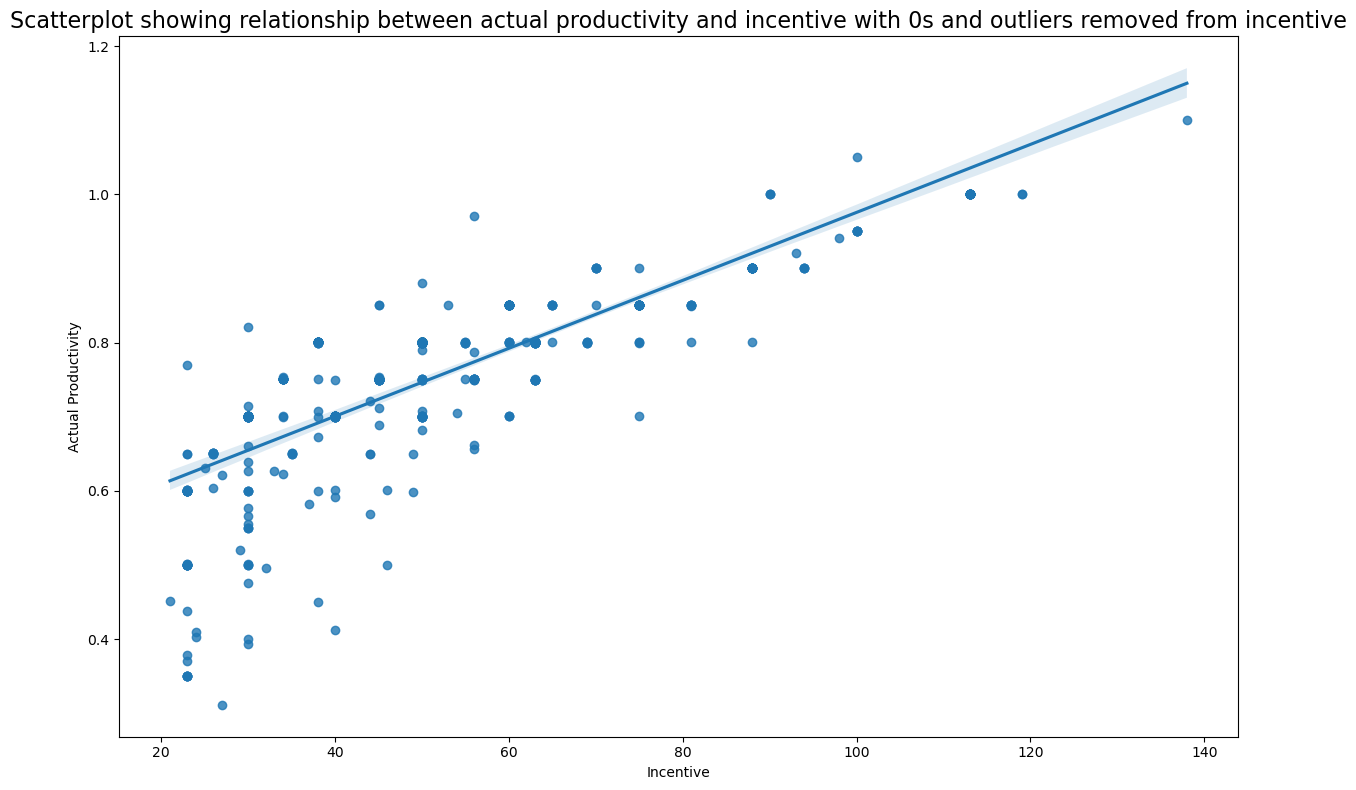

In [251]:
# Filter the data to remove zeros and outliers from the incentive variable
df1 = df[(df["incentive"] < 960) & (df["incentive"] != 0)]

# Set up the plot
plt.figure(figsize=(12, 8))
plt.title("Scatterplot showing relationship between actual productivity and incentive with 0s and outliers removed from incentive", fontsize=16)

# Plot the data points and add a linear regression line
sns.regplot(x="incentive", y="actual_productivity", data=df1, scatter=True)

plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')

plt.tight_layout()
plt.show()

In [252]:
# Run this first before 64 line number

In [253]:
fig = px.histogram(df, x='incentive',
                   marginal = 'violin')

fig.update_layout(title='Distribution of incentive', title_x=0.5)
# Show the plot
fig.show()

In [254]:
df['incentive_bin'] = pd.cut(df['incentive'], bins=[-1, 20, 40, 60, 80, 100, 120, 140, 150], labels=False)
df

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month,incentive_bin
0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,4
1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1,0
2,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2
3,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2
4,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,11,3,0
1193,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,3,0
1194,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,3,0
1195,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,11,3,0


In [255]:
fig = px.histogram(df, x='incentive_bin',
                   marginal='violin')
fig.update_layout(title='Distribution of Incentive as bins', title_x=0.5)

# Show the plot
fig.show()

### productivity
- Convert targeted_productivity, actual_productivity to 3 classes (low, medium, high)

Consider the correlation between target_productivity and actual_productivity

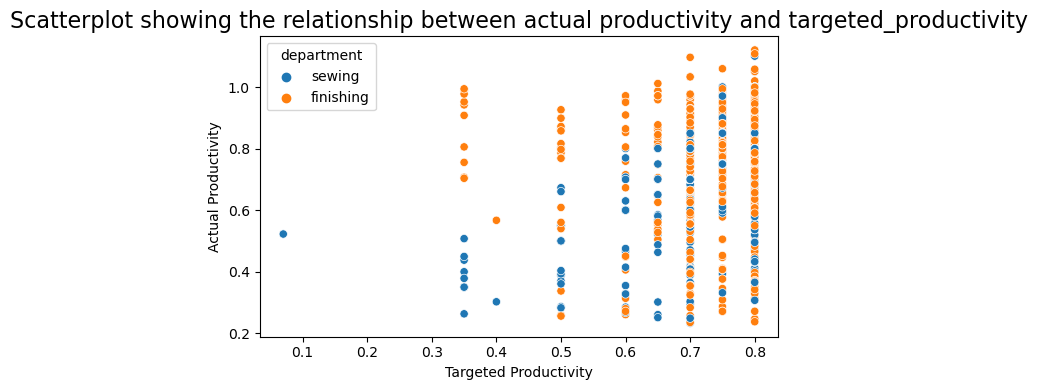

In [256]:
# Set up the plot
plt.figure(figsize=(6,4))
plt.title("Scatterplot showing the relationship between actual productivity and targeted_productivity", fontsize=16)

# Plot the data points with different colors for each department
sns.scatterplot(x="targeted_productivity", y="actual_productivity", hue="department", data=df)

plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')

plt.tight_layout()
plt.show()

To clearly show the correlation between these two features, let's try to look at the median value of actual_productivity over different values ​​of target_productivity.

In [257]:
df.targeted_productivity.value_counts()

0.80    537
0.70    240
0.75    213
0.65     62
0.60     56
0.50     49
0.35     26
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

In [258]:
df["actual_productivity"]

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1186, dtype: float64

In [259]:
df.groupby("targeted_productivity").median()["actual_productivity"]

targeted_productivity
0.07    0.522845
0.35    0.419164
0.40    0.435074
0.50    0.500567
0.60    0.600257
0.65    0.650303
0.70    0.700392
0.75    0.750651
0.80    0.800535
Name: actual_productivity, dtype: float64

In [260]:
grouped_data

,targeted_productivity,median
0,0.07,0.522845
1,0.35,0.400333
2,0.40,0.435074
3,0.50,0.500567
4,0.60,0.600273
5,0.65,0.650300
6,0.70,0.700374
7,0.75,0.750651
8,0.80,0.800536


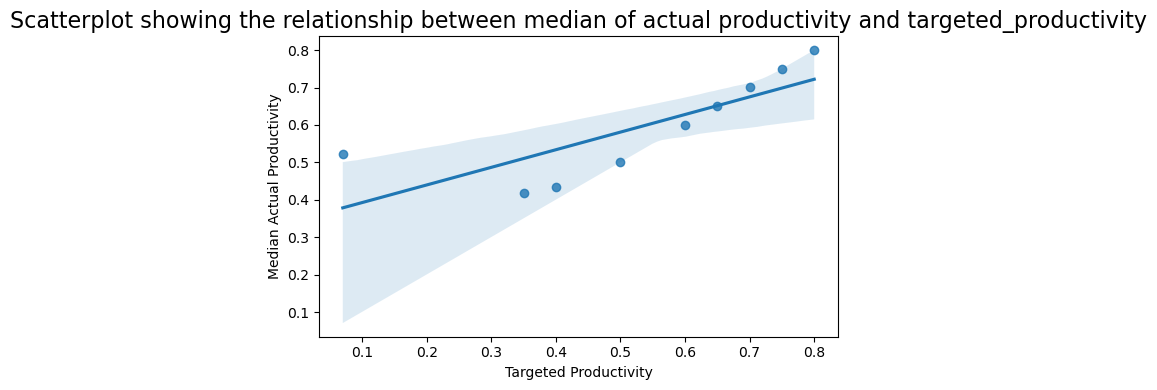

In [261]:
# Group the data by targeted_productivity and calculate the median of actual_productivity
grouped_data = df.groupby("targeted_productivity").median()["actual_productivity"]
grouped_data = grouped_data.reset_index()
grouped_data.rename(columns={"actual_productivity": "median"}, inplace=True)


plt.figure(figsize=(6,4))
plt.title("Scatterplot showing the relationship between median of actual productivity and targeted_productivity", fontsize=16)

# Plot the data points 
sns.regplot(x="targeted_productivity", y="median", data=grouped_data, scatter=True)

plt.xlabel('Targeted Productivity')
plt.ylabel('Median Actual Productivity')

plt.tight_layout()
plt.show()

We can now see a relatively strong correlation between these two features. And when the median value is greater than or equal to 0.5, the correlation with target_productivity becomes stronger.

In [262]:
df['actual_productivity_label'] = pd.cut(df['actual_productivity'], bins=[-1, 0.3, 0.6, 1.1], labels=False)
df.head()

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month,incentive_bin,actual_productivity_label
0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,4,2.0
1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1,0,2.0
2,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2,2.0
3,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2,2.0
4,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2,2.0


In [263]:
df['targeted_productivity_label'] = pd.cut(df['targeted_productivity'], bins=[-1, 0.3, 0.6, 1.1], labels=False)
df

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month,incentive_bin,actual_productivity_label,targeted_productivity_label
0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,4,2.0,2
1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1,0,2.0,2
2,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2,2.0,2
3,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2,2.0,2
4,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,11,3,0,2.0,2
1193,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,3,0,2.0,2
1194,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,11,3,0,2.0,2
1195,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,11,3,0,1.0,2


### ```wip```

In [264]:
df.wip.isna().sum() / df.shape[0] # a lot of missing data 

0.418212478920742

There is more than 40%, thus imputation may be unrelibale and introduce bias to the data.  
 will deal later 

In [265]:
fig = px.histogram(df, x='wip',
                   marginal = 'violin')

fig.update_layout(title='Distribution of Work in Progress', title_x=0.5)
# Show the plot
fig.show()

In [266]:
fig = px.box(df, y='wip')

fig.update_layout(title='Distribution of Work in Progress', title_x=0.5)
# Show the plot
fig.show()

$IQR = Q3 - Q1 = 478$ => Outliers will be greater than $Q3 + 1.5 IQR = 1971$

In [267]:
# df.drop(df[df['wip'] >= 1971].index, inplace=True)

In [268]:

fig = px.histogram(df, x='wip',
                    marginal = 'violin')

fig.update_layout(title='Distribution of Work in Progress', title_x=0.5)
# Show the plot
fig.show()

In [269]:
fig = px.box(df, y='wip')

fig.update_layout(title='Distribution of Work in Progress', title_x=0.5)
# Show the plot
fig.show()

There are still some outliers lefts with small value, leave them for now.

### other features

In [198]:
# df['no_of_style_change'].value_counts().plot(kind='pie')

In [270]:
fig = px.box(df, y='no_of_style_change')

# Show the plot
fig.show()

Looks very useless, as all samples but 2 (probably outliers) have value 0.

In [271]:
# df = df.drop(['no_of_style_change'], axis=1)

In [272]:
df['idle_time'].value_counts()

0.0      1156
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [273]:
fig = px.box(df, y='idle_time')

# Show the plot
fig.show()

In [274]:
fig = px.box(df, y='idle_men')

# Show the plot
fig.show()

These 2 also columns has to many zeros  but we will keep them around, as they may not be accidental mistakes.

# Multivariate Analysis + Plots

In [275]:
df.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      200
Thursday     198
Saturday     187
Monday       178
Name: day, dtype: int64

In [276]:
df.head(4)

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,day_of_month,month,incentive_bin,actual_productivity_label,targeted_productivity_label
0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725,1,1,4,2.0,2
1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,8.0,0.886500,1,1,0,2.0,2
2,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,1,2,2.0,2
3,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,1,2,2.0,2


In [277]:
df['no_of_workers'].sum()

40648.5

### Number of workers in each team, for each department

In [278]:
fig = px.bar(x=df['team'],
             y=df['no_of_workers'])

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='# Workers',
    title='Workers in each team'
)

# fig.show()


 if more workers means higher productivity, or contrary, or not related at all

In [279]:
fig = px.bar(x=df['team'],
             y=df['actual_productivity'])

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Productivity',
    title='Workers in each team'
)

fig.show()

In [280]:
fig = px.bar(x=range(1, 13), y = df.groupby('team')['actual_productivity'].mean())

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Productivity',
    title='Average productivity of each team'
)

fig.show()

Seems like team 1, 2,3, 4, 9 , and 12 were the most efficient! Meanwhile, teams 6, 7, 8, 11 have been slacking off.

In [281]:
import plotly.graph_objects as go
# import plotly.io as pio
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

### Number of workers in each day of the week, as well as their overtime*

In [282]:
fig = make_subplots(rows=1, cols=3)

# Plot of no_of_workers VS day
fig.add_trace(go.Bar(
    x=df['day'],
    y=df['no_of_workers'],
    name='Number of workers'
), row=1, col=1)

fig.update_xaxes(title_text="Day", row=1, col=1)
fig.update_yaxes(title_text="Number of Workers", row=1, col=1)

In [283]:
fig = make_subplots(rows=1, cols=3)

# Plot of no_of_workers VS day
fig.add_trace(go.Bar(
    x=df['day'],
    y=df['no_of_workers'],
    name='Number of workers'
), row=1, col=1)

fig.update_xaxes(title_text="Day", row=1, col=1)
fig.update_yaxes(title_text="Number of Workers", row=1, col=1)

# Plot of overtime VS day
fig.add_trace(go.Bar(
    x=df['day'],
    y=df['over_time'],
    name='Overtime'
), row=1, col=2)

fig.update_xaxes(title_text="Day", row=1, col=2)
fig.update_yaxes(title_text="Overtime", row=1, col=2)

# Plot of incentive VS day
fig.add_trace(go.Bar(
    x=df['day'],
    y=df['incentive'],
    name='Incentive'
), row=1, col=3)

fig.update_xaxes(title_text="Day", row=1, col=2)
fig.update_yaxes(title_text="Incentive", row=1, col=2)


fig.update_layout(
    title='Workers, Overtime and Incentive for each day',
    template='ggplot2'
)

fig.show()

In [284]:
fig = make_subplots(rows=2, cols=2)

# Plot of no_of_workers VS day
fig.add_trace(go.Bar(
    x=['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    y=df.groupby('day')['no_of_workers'].mean(),
    name='Number of workers'
), row=1, col=1)

fig.update_xaxes(title_text="Day", row=1, col=1)
fig.update_yaxes(title_text="Number of Workers", row=1, col=1)

# Plot of overtime VS day
fig.add_trace(go.Bar(
    x=['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    y=df.groupby('day')['over_time'].mean(),
    name='Overtime'
), row=1, col=2)

fig.update_xaxes(title_text="Day", row=1, col=2)
fig.update_yaxes(title_text="Overtime", row=1, col=2)

# Plot of incentive VS day
fig.add_trace(go.Bar(
    x=['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    y=df.groupby('day')['incentive'].mean(),
    name='Incentive'
), row=2, col=1)

fig.update_xaxes(title_text="Day", row=2, col=1)
fig.update_yaxes(title_text="Incentive", row=2, col=1)

# Plot of incentive VS day
fig.add_trace(go.Bar(
    x=['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
    y=df.groupby('day')['actual_productivity'].mean(),
    name='Productivity'
), row=2, col=2)

fig.update_xaxes(title_text="Day", row=2, col=2)
fig.update_yaxes(title_text="Productivity", row=2, col=2)


fig.update_layout(
    title='Averages for each day',
    template='ggplot2'
)

fig.show()

Always nice to get a day off!

### By month:

In [285]:
fig = make_subplots(rows=2, cols=2)

# Plot of no_of_workers VS day
fig.add_trace(go.Bar(
    x=df['month'],
    y=df['no_of_workers'],
    name='Number of workers'
), row=1, col=1)

fig.update_xaxes(title_text="Day", row=1, col=1)
fig.update_yaxes(title_text="Number of Workers", row=1, col=1)

# Plot of overtime VS day
fig.add_trace(go.Bar(
    x=df['month'],
    y=df['over_time'],
    name='Overtime'
), row=1, col=2)

fig.update_xaxes(title_text="Month", row=1, col=2)
fig.update_yaxes(title_text="Overtime", row=1, col=2)

# Plot of incentive VS month
fig.add_trace(go.Bar(
    x=df['month'],
    y=df['incentive'],
    name='Incentive'
), row=2, col=1)

fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Incentive", row=2, col=1)

# Plot of incentive VS day
fig.add_trace(go.Bar(
    x=df['month'],
    y=df['actual_productivity'],
    name='productivity'
), row=2, col=2)

fig.update_xaxes(title_text="Month", row=2, col=2)
fig.update_yaxes(title_text="Productivity", row=2, col=2)


fig.update_layout(
    title='Workers, Overtime and Incentive for each month',
)

fig.show()

In [ ]:
df['month'].value_counts()

In [286]:
fig = make_subplots(rows=2, cols=2)

# Plot of no_of_workers VS day
fig.add_trace(go.Bar(
    x=['January', 'February', 'March'],
    y=df.groupby('month')['no_of_workers'].mean(),
    name='Number of workers'
), row=1, col=1)

fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_yaxes(title_text="Number of Workers", row=1, col=1)

# Plot of overtime VS day
fig.add_trace(go.Bar(
    x=['January', 'February', 'March'],
    y=df.groupby('month')['over_time'].mean(),
    name='Overtime'
), row=1, col=2)

fig.update_xaxes(title_text="Month", row=1, col=2)
fig.update_yaxes(title_text="Overtime", row=1, col=2)

# Plot of incentive VS month
fig.add_trace(go.Bar(
    x=['January', 'February', 'March'],
    y=df.groupby('month')['incentive'].mean(),
    name='Incentive'
), row=2, col=1)

fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Incentive", row=2, col=1)

# Plot of incentive VS day
fig.add_trace(go.Bar(
    x=['January', 'February', 'March'],
    y=df.groupby('month')['actual_productivity'].mean(),
    name='productivity'
), row=2, col=2)

fig.update_xaxes(title_text="Month", row=2, col=2)
fig.update_yaxes(title_text="Productivity", row=2, col=2)


fig.update_layout(
    title='Workers, Overtime and Incentive for each month',
)

fig.show()

### Number of workers in each day of the month

In [287]:
fig = make_subplots(rows=2, cols=2)

# Plot of no_of_workers VS day
fig.add_trace(go.Bar(
    x=df['day_of_month'].unique(),
    y=df.groupby('day_of_month')['no_of_workers'].mean(),
    name='Number of workers'
), row=1, col=1)


fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_yaxes(title_text="Number of Workers", row=1, col=1)

# Plot of productivity VS day
fig.add_trace(go.Bar(
    x=df['day_of_month'].unique(),
    y=df.groupby('day_of_month')['actual_productivity'].mean(),
    name='Productivity'
), row=1, col=2)


### Number of workers in each week of the month

In [289]:
# fig = make_subplots(rows=1, cols=2)

# # Plot of no_of_workers VS day
# fig.add_trace(go.Bar(
#     x=df['week'].unique(),
#     y=df.groupby('week')['no_of_workers'].mean(),
#     name='Number of workers'
# ), row=1, col=1)

# fig.update_xaxes(title_text="Week", row=1, col=1)
# fig.update_yaxes(title_text="Number of Workers", row=1, col=1)

# # Plot of productivity VS day
# fig.add_trace(go.Bar(
#     x=df['week'].unique(),
#     y=df.groupby('week')['actual_productivity'].mean(),
#     name='Productivity'
# ), row=1, col=2)

# fig.update_xaxes(title_text="Week", row=1, col=2)
# fig.update_yaxes(title_text="Productivity", row=1, col=2)

# fig.show()

In [290]:
df.head()

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,day_of_month,month,incentive_bin,actual_productivity_label,targeted_productivity_label
0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725,1,1,4,2.0,2
1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,8.0,0.886500,1,1,0,2.0,2
2,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,1,2,2.0,2
3,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,1,2,2.0,2
4,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382,1,1,2,2.0,2


In [ ]:
# df = df.drop(['day_of_month'], axis=1)

In [ ]:
# df[df['actual_productivity'] >= 1.0] # just analyse

# Preprocessing

In [292]:
df[df['actual_productivity'] <= 1.0]

In [297]:
# df

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,day_of_month,month,incentive_bin,actual_productivity_label,targeted_productivity_label
0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725,1,1,4,2.0,2
1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,8.0,0.886500,1,1,0,2.0,2
2,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,1,2,2.0,2
3,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,1,2,2.0,2
4,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382,1,1,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,8.0,0.628333,11,3,0,2.0,2
1193,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,8.0,0.625625,11,3,0,2.0,2
1194,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,8.0,0.625625,11,3,0,2.0,2
1195,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,15.0,0.505889,11,3,0,1.0,2


In [298]:
# shuffle the data
df = df.sample(frac=1, random_state=42)
df

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,day_of_month,month,incentive_bin,actual_productivity_label,targeted_productivity_label
837,finishing,Wednesday,10,0.80,3.94,NaN,960,0,0.0,0,8.0,0.640250,18,2,0,2.0,2
953,sewing,Thursday,10,0.70,21.82,1591.0,3240,0,0.0,0,52.0,0.700252,26,2,0,2.0,2
290,sewing,Saturday,4,0.70,22.52,825.0,10170,50,0.0,0,56.5,0.700542,17,1,2,2.0,2
1089,sewing,Saturday,1,0.70,26.82,1267.0,8160,70,0.0,0,58.0,0.850045,7,3,3,2.0,2
333,sewing,Monday,1,0.50,22.94,1492.0,10170,30,0.0,0,56.5,0.549969,19,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,sewing,Saturday,3,0.80,29.40,983.0,6840,63,0.0,0,57.0,0.800579,7,3,3,2.0,2
1154,finishing,Tuesday,4,0.75,3.94,NaN,960,0,0.0,0,8.0,0.881575,10,3,0,2.0,2
1189,sewing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,57.0,0.700505,11,3,1,2.0,2
909,sewing,Tuesday,7,0.75,30.10,739.0,5640,45,0.0,0,59.0,0.750727,24,2,2,2.0,2
